**Question**
**เราต้องการสไตล์การกินของแต่ละประเทศต่างๆเพื่อที่ต้องการรู้ว่าควรทำหรืออกแบบมาเป็นรูปแบบไหนและความนิยมต่างๆของราเมง**


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ramen-ratings/ramen-ratings.csv


**ส่วนที่2 ดึงข้อมูลมา**

In [2]:
# ดึงข้อมูลจากไฟล์
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt     # for visualisation
import seaborn as sns     # for visualisation
from wordcloud import WordCloud    # for create word cloud
import random    # for use in random color in word cloud

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ramen-ratings/ramen-ratings.csv


In [3]:
# ข้อมูลที่มีอยู่ในdata set 
ramen_data = pd.read_csv('/kaggle/input/ramen-ratings/ramen-ratings.csv')
ramen_data.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [4]:
ramen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
Review #    2580 non-null int64
Brand       2580 non-null object
Variety     2580 non-null object
Style       2578 non-null object
Country     2580 non-null object
Stars       2580 non-null object
Top Ten     41 non-null object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


**ส่วนที่ 3 คือข้อมูลที่ขาดหาย**

In [5]:
ramen_data.replace([np.inf, -np.inf], np.nan)
ramen_data.isnull().any()


Review #    False
Brand       False
Variety     False
Style        True
Country     False
Stars       False
Top Ten      True
dtype: bool

In [6]:
ramen_data['Style'].value_counts()

Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: Style, dtype: int64

In [7]:
ramen_data['Top Ten'].value_counts()

\n          4
2012 #10    1
2012 #6     1
2014 #6     1
2014 #4     1
2015 #6     1
2013 #9     1
2012 #3     1
2014 #7     1
2012 #5     1
2015 #10    1
2016 #5     1
2015 #1     1
2014 #5     1
2013 #3     1
2016 #7     1
2013 #4     1
2014 #1     1
2016 #10    1
2015 #4     1
2013 #10    1
2012 #2     1
2014 #9     1
2012 #4     1
2016 #9     1
2013 #2     1
2015 #8     1
2013 #6     1
2014 #8     1
2015 #7     1
2014 #10    1
2012 #9     1
2013 #1     1
2012 #1     1
2016 #8     1
2015 #9     1
2016 #1     1
2012 #7     1
Name: Top Ten, dtype: int64

In [8]:
ramen_data['Stars'].value_counts()

4          384
5          369
3.75       350
3.5        326
3          173
3.25       170
4.25       143
4.5        132
2.75        85
2           68
2.5         67
4.75        64
1.5         37
1.75        27
1           26
0           26
2.25        21
0.5         14
0.25        11
5.0         10
1.25        10
3.50         9
5.00         7
4.00         6
4.3          4
4.50         3
4.0          3
Unrated      3
3.8          3
4.125        2
2.3          2
3.0          2
2.9          2
3.1          2
2.8          2
1.1          2
2.85         1
3.7          1
2.1          1
0.9          1
2.125        1
0.1          1
3.65         1
3.2          1
3.00         1
0.75         1
3.6          1
3.125        1
1.8          1
3.4          1
3.3          1
Name: Stars, dtype: int64

In [9]:
def length_Style(x):
    if pd.isnull(x):
        return 'Pack'
    else:
        return x
ramen_data['Style'] = ramen_data['Style'].apply(length_Style)

In [10]:
def length_Top_Ten(x):
    if pd.isnull(x):
        return '\n'
    else:
        return x
ramen_data['Top Ten'] = ramen_data['Top Ten'].apply(length_Top_Ten)

In [11]:
def length_Stars(x):
    if pd.isnull(x) or 'Unrated':
        return 3.75
    else:
        return x
ramen_data['Stars'] = ramen_data['Stars'].apply(length_Stars)

In [12]:
ramen_data['Brand'] = ramen_data['Brand'].str.lower()
ramen_data.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,new touch,T's Restaurant Tantanmen,Cup,Japan,3.75,\n
1,2579,just way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,3.75,\n
2,2578,nissin,Cup Noodles Chicken Vegetable,Cup,USA,3.75,\n
3,2577,wei lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,3.75,\n
4,2576,ching's secret,Singapore Curry,Pack,India,3.75,\n


In [13]:
# นับจำนวนแบรนด์ที่ได้รับการีวิว
ramen_brand = ramen_data.groupby(['Brand','Country']).agg({'Review #':'count'})
ramen_brand = ramen_brand.reset_index() 
ramen_brand = ramen_brand.sort_values('Review #', ascending = False)
# นับแบรนด์จากแต่ละประเทศที่ได้รับการีวิว
ramen_coun = ramen_brand.groupby('Country').agg({'Brand':'count'}).reset_index()
ramen_coun = ramen_coun.rename(columns = {'Brand':'Amount of brand'})
ramen_coun = ramen_coun.sort_values(['Amount of brand', 'Country'], ascending = [False, True])
# ดู 10 ประเทศแรกที่มีราเม็งมากที่สุด
ramen_coun.head(10)

,Country,Amount of brand
18,Japan,58
35,USA,49
32,Taiwan,47
30,South Korea,35
5,China,33
19,Malaysia,32
33,Thailand,24
17,Indonesia,19
37,Vietnam,19
14,Hong Kong,12


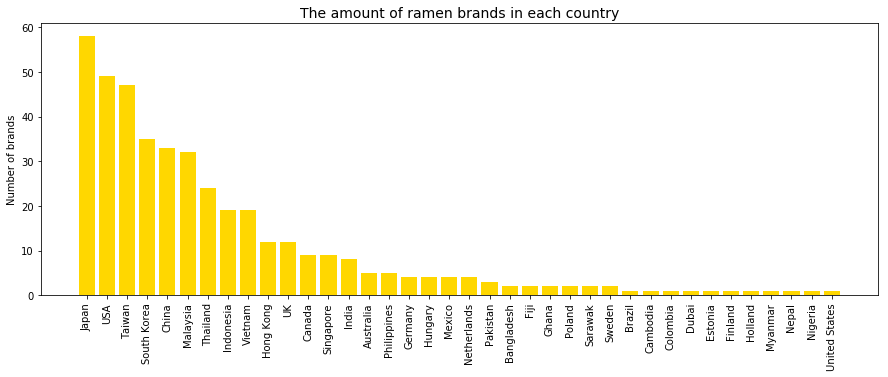

In [14]:
# แผนภูมิแท่งของจำนวนแบรนด์ราเม็งในแต่ละประเทศที่ได้รับการรีวิว
plt.figure(figsize=(15, 5))
plt.bar('Country', 'Amount of brand', data = ramen_coun, color = 'gold')
plt.title( 'The amount of ramen brands in each country', fontsize=14)
plt.ylabel('Number of brands')
plt.xticks(rotation = 90)
plt.show()

****จากกราฟนี้จะเห็นได้ว่าประเทศญี่ปุ่นนั้นได้มีการรีวิวมากที่สุด****

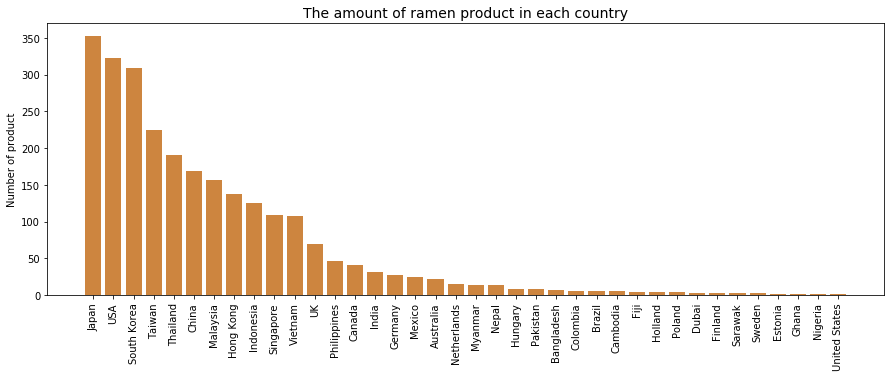

In [15]:
# นำเสนอความหลากหลายของแต่ละประเทศที่ได้รับการรีวิว
ramen_variety = ramen_data.groupby(['Country']).agg({'Variety':'count'})
ramen_variety = ramen_variety.reset_index() 
ramen_variety = ramen_variety.sort_values(['Variety','Country'], ascending = [False, True])
ramen_variety = ramen_variety.rename(columns = {'Variety': 'Country variety'})

# แผนภูมิแท่งของจำนวนผลิตภัณฑ์ราเม็งในแต่ละประเทศที่ได้รับการรีวิว
plt.figure(figsize=(15, 5))
plt.bar('Country', 'Country variety', data = ramen_variety, color = 'peru')
plt.title( 'The amount of ramen product in each country', fontsize=14)
plt.ylabel('Number of product')
plt.xticks(rotation = 90)
plt.show()

**ตรงนี้เราจะสังเกตุได้ว่าประเทศญี่ปุ่นนั้นได้มีการผลิตภัณฑ์ราเม็งมากที่สุดเลยมีการรีวิวมากที่สุด**

In [16]:
# Count number of style in each country
ramen_style = ramen_data.groupby(['Country','Style']).agg({'Variety':'count'})
ramen_style = ramen_style.reset_index()
ramen_style.head()

,Country,Style,Variety
0,Australia,Cup,17
1,Australia,Pack,5
2,Bangladesh,Pack,7
3,Brazil,Cup,2
4,Brazil,Pack,3


In [17]:
# Find the unique ramen styles
style_name = sorted(ramen_style['Style'].unique())
print(style_name)

['Bar', 'Bowl', 'Box', 'Can', 'Cup', 'Pack', 'Tray']


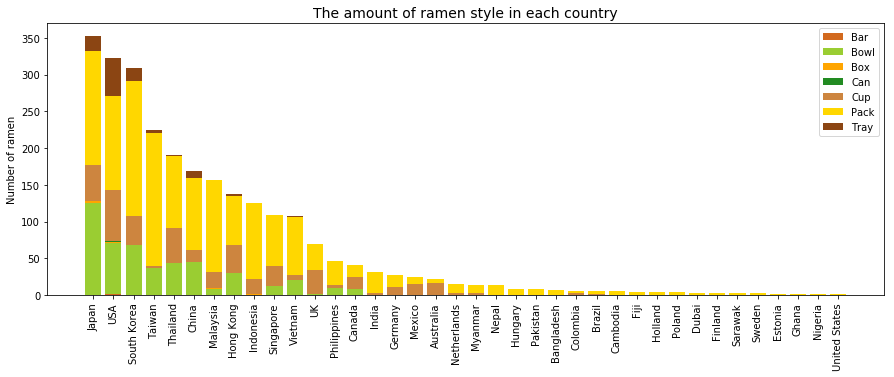

In [18]:
# Not every styles were produce in every countries,thus, those styles were not present in the table
# Create the index of every styles in each country and add count number 0
# by create dummie column, merge and fill the NaN with 0
pattern = pd.DataFrame({'dummie' : [0]*266}, \
                       index = pd.MultiIndex.from_product([ramen_coun['Country'], style_name], \
                       names = ['Country', 'Style']))
ramen_style = pd.merge(ramen_style, pattern, how='outer', on=['Country', 'Style'])
ramen_style = ramen_style[['Country', 'Style', 'Variety']].fillna(0)

# Merge ramen_style with ramen_variety to be able to sort with the amount of brand
ramen_style = pd.merge(ramen_style, ramen_variety, how = 'left', on = 'Country')
ramen_style =ramen_style.sort_values(['Country variety','Country', 'Style'], ascending = [False,True, True])
# Create stack bar chart
plt.figure(figsize=(15, 5))
bottom_bar = [0]*38 # for identify the bottom of the bar graph in each style
bar_color = ['chocolate', 'yellowgreen', 'orange', 'forestgreen', 'peru', 'gold', 'saddlebrown']

# Use for loop for plot bar chart and stack the amount of ramen in each ramen style
for i in range(len(style_name)):
    plt.bar('Country', 'Variety', data = ramen_style[ramen_style['Style'] == style_name[i]], \
            bottom = bottom_bar, color = bar_color[i])
    # change the bottom_bar to the the amount of current style for the next loop
    bottom_bar = list(np.add(bottom_bar, ramen_style[ramen_style['Style'] == style_name[i]]['Variety']))

plt.title( 'The amount of ramen style in each country', fontsize=14)
plt.ylabel('Number of ramen')
plt.xticks(rotation = 90)
plt.legend(style_name)
plt.show()

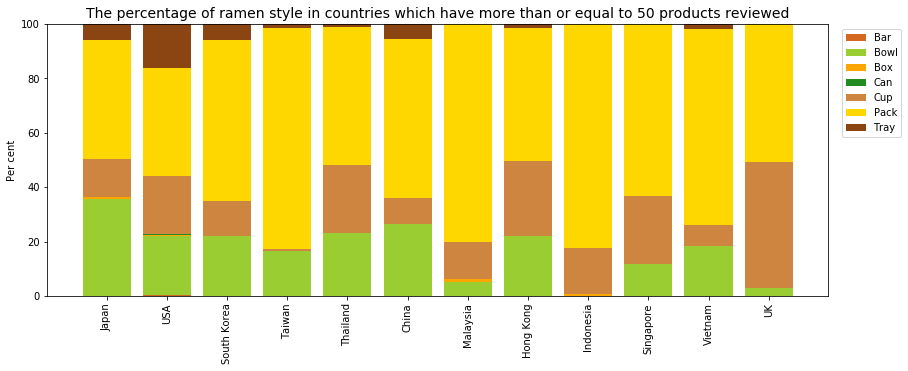

In [19]:
# Create percentage stack bar chart of countries which have more than or equal to 50 products reviewed
# Select only countries which have more than or equal to 50 products reviewed
ramen_per = ramen_style[ramen_style['Country variety'] >= 50].reset_index()

# Create percentage column in ramen_style
ramen_per['Percentage'] = ramen_per['Variety'] * 100 / ramen_per['Country variety']

# Create percentage stack bar chart
plt.figure(figsize=(14, 5))
bottom_bar = [0]*12 # for identify the bottom of the bar graph in each style
for i in range(len(style_name)):
    plt.bar('Country', 'Percentage', data = ramen_per[ramen_per['Style'] == style_name[i]], \
            bottom = bottom_bar, color = bar_color[i])
    bottom_bar = list(np.add(bottom_bar, ramen_per[ramen_per['Style'] == style_name[i]]['Percentage']))

plt.title('The percentage of ramen style in countries which have more than or equal to 50 products reviewed', \
          fontsize=14)
plt.ylabel('Per cent')
plt.xticks(rotation = 90)
plt.legend(style_name,bbox_to_anchor=(1.1, 1))    # move legend box to the right of the graph
plt.show()

ค้นหาราเมงดาวเฉลี่ยในแต่ละยี่ห้อ

In [20]:
ramen_data.describe(include='all')

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
count,2580.000000,2580,2580,2580,2580,2580.00,2580
unique,NaN,353,2413,7,38,NaN,38
top,NaN,nissin,Beef,Pack,Japan,NaN,\n
freq,NaN,381,7,1533,352,NaN,2543
mean,1290.500000,NaN,NaN,NaN,NaN,3.75,NaN
std,744.926171,NaN,NaN,NaN,NaN,0.00,NaN
min,1.000000,NaN,NaN,NaN,NaN,3.75,NaN
25%,645.750000,NaN,NaN,NaN,NaN,3.75,NaN
50%,1290.500000,NaN,NaN,NaN,NaN,3.75,NaN
75%,1935.250000,NaN,NaN,NaN,NaN,3.75,NaN


In [21]:
# Convert 'Stars' column to int
ramen_data['Stars'] = pd.to_numeric(ramen_data['Stars'], errors = 'coerce')
ramen_data.describe(include='all')

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
count,2580.000000,2580,2580,2580,2580,2580.00,2580
unique,NaN,353,2413,7,38,NaN,38
top,NaN,nissin,Beef,Pack,Japan,NaN,\n
freq,NaN,381,7,1533,352,NaN,2543
mean,1290.500000,NaN,NaN,NaN,NaN,3.75,NaN
std,744.926171,NaN,NaN,NaN,NaN,0.00,NaN
min,1.000000,NaN,NaN,NaN,NaN,3.75,NaN
25%,645.750000,NaN,NaN,NaN,NaN,3.75,NaN
50%,1290.500000,NaN,NaN,NaN,NaN,3.75,NaN
75%,1935.250000,NaN,NaN,NaN,NaN,3.75,NaN


In [22]:
# Group ramen_data by Country and Brand column 
# and calculate the mean and median of Stars that each brand received
ramen_stars = ramen_data.groupby(['Country','Brand']).agg({'Stars': ['mean', 'median'], 'Review #': 'count'})
ramen_stars = ramen_stars.reset_index()
ramen_stars.columns = ['Country','Brand','Mean Stars', 'Median Stars', 'Review#']
ramen_stars = ramen_stars.sort_values('Median Stars', ascending = False)

# Create new column for label
ramen_stars['Country Brand'] = ramen_stars['Brand'] + ' (' + ramen_stars['Country'] + ')'
ramen_stars.head()

,Country,Brand,Mean Stars,Median Stars,Review#,Country Brand
0,Australia,fantastic,3.75,3.75,6,fantastic (Australia)
313,Thailand,7 select,3.75,3.75,2,7 select (Thailand)
285,Taiwan,long kow,3.75,3.75,1,long kow (Taiwan)
284,Taiwan,long jun hang,3.75,3.75,2,long jun hang (Taiwan)
283,Taiwan,little cook,3.75,3.75,1,little cook (Taiwan)



**ในการเปรียบเทียบที่เป็นธรรมควรเปรียบเทียบดาวเฉลี่ยภายในแบรนด์ที่ได้รับความเห็นอย่างน้อย 10 ข้อเท่านั้น**

In [23]:
# ดูแบรนด์ 5 อันดับแรกที่มีดาวเฉลี่ยสูงสุด (เรียงลำดับตามค่าเฉลี่ย)
ramen_stars_re = ramen_stars[ramen_stars['Review#'] >= 10].reset_index()
ramen_stars_re = ramen_stars_re.sort_values('Mean Stars', ascending = False)
ramen_stars_re.head()

,index,Country,Brand,Mean Stars,Median Stars,Review#,Country Brand
0,271,Taiwan,deshome,3.75,3.75,13,deshome (Taiwan)
50,35,China,master kong,3.75,3.75,28,master kong (China)
36,73,Hong Kong,nissin,3.75,3.75,67,nissin (Hong Kong)
37,67,Hong Kong,fuku,3.75,3.75,10,fuku (Hong Kong)
38,65,Hong Kong,doll,3.75,3.75,16,doll (Hong Kong)


In [24]:
# ดูแบรนด์ 5 อันดับแรกที่มีดาวเฉลี่ยต่ำสุด (เรียงตามค่าเฉลี่ย)
ramen_stars_re.tail()

,index,Country,Brand,Mean Stars,Median Stars,Review#,Country Brand
28,334,Thailand,wai wai,3.75,3.75,22,wai wai (Thailand)
29,326,Thailand,nissin,3.75,3.75,17,nissin (Thailand)
30,324,Thailand,mama,3.75,3.75,74,mama (Thailand)
31,323,Thailand,little cook,3.75,3.75,13,little cook (Thailand)
66,417,Vietnam,vina acecook,3.75,3.75,34,vina acecook (Vietnam)


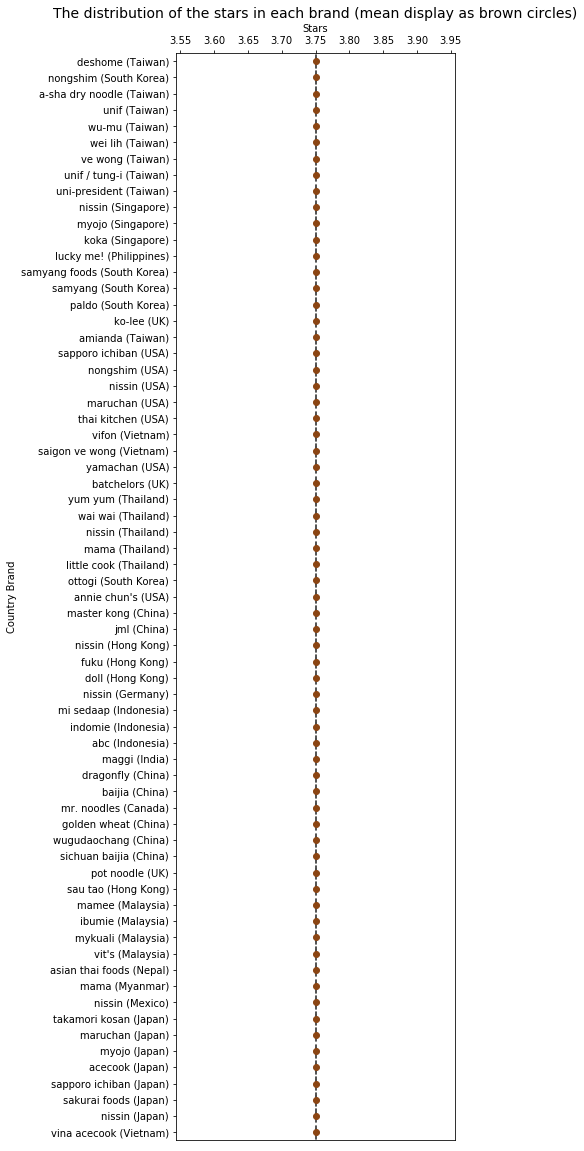

In [25]:
# Create box plot with mean
# Sort by median of the stars for the order in box plot
ramen_stars_re = ramen_stars_re.sort_values('Median Stars', ascending = False)

# Create boxplot
ramen_box = ramen_data[['Country','Brand','Stars']].reset_index()
ramen_box['Country Brand'] = ramen_box['Brand'] + ' (' + ramen_box['Country'] + ')'

# Select only brand in country that in ramen_stars_re
ramen_box = ramen_box[ramen_box['Country Brand'].isin(ramen_stars_re['Country Brand'])]

# Create boxplot
fig, ax = plt.subplots(figsize=(5, 20))
sns.boxplot(x = 'Stars', y = 'Country Brand', data = ramen_box, color = 'yellow',\
            order = ramen_stars_re['Country Brand'], showmeans = True,\
            meanprops = {'marker': 'o','markerfacecolor': 'saddlebrown', 'markeredgecolor': 'saddlebrown'})
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
plt.title( 'The distribution of the stars in each brand (mean display as brown circles)', \
          fontsize=14)
plt.show()

In [26]:
# จัดอันดับราเมนตามคอลัมน์ดาว
ramen_sort = ramen_data.sort_values('Stars').dropna(subset = ['Stars'])

# แบ่งออกเป็น 100 อันดับแรกและต่ำสุด 100
ramen_top = ramen_sort.head(100)
ramen_bottom = ramen_sort.tail(100)
ramen_bottom.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
928,1652,myori,Malaysia Penang White Curry Noodle Original,Pack,Malaysia,3.75,\n
929,1651,ruski,Chicken Flavour Instant Noodles,Pack,Malaysia,3.75,\n
930,1650,ottogi,Sesame Flavor Ramen Korean Style Instant Noodle,Pack,South Korea,3.75,\n
931,1649,master kong,Seafood Flavour Instant Cooking Noodles,Pack,China,3.75,\n
932,1648,wei lih,Instant Noodles With Onion Flavour,Pack,Taiwan,3.75,\n


In [27]:
categori = ['Style', 'Country']
model_data = pd.get_dummies(ramen_data.copy(), columns=categori,drop_first=True)

In [28]:
# กำหนด X และ y
X = model_data.drop(columns=['Brand', 'Review #','Top Ten','Variety'],axis=1)
y = model_data['Brand']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [29]:
ramen = RandomForestClassifier(n_estimators=100)
ramen.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
ramen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
Review #    2580 non-null int64
Brand       2580 non-null object
Variety     2580 non-null object
Style       2580 non-null object
Country     2580 non-null object
Stars       2580 non-null float64
Top Ten     2580 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 141.2+ KB


In [31]:
ramen_data.replace([np.inf, -np.inf], np.nan)
ramen_data.isnull().any()

Review #    False
Brand       False
Variety     False
Style       False
Country     False
Stars       False
Top Ten     False
dtype: bool

In [32]:
predictions = ramen.predict(X_test)

In [33]:
print(classification_report(y_test,predictions))

                        precision    recall  f1-score   support

              7 select       0.00      0.00      0.00         1
                 a-one       0.00      0.00      0.00         2
      a-sha dry noodle       0.21      1.00      0.35        10
                    a1       0.00      0.00      0.00         1
                   abc       0.17      0.33      0.22         3
               acecook       0.00      0.00      0.00         3
                 adabi       0.00      0.00      0.00         1
             ajinatori       0.00      0.00      0.00         1
               amianda       0.00      0.00      0.00         2
          annie chun's       0.00      0.00      0.00         1
             asia gold       0.00      0.00      0.00         2
      asian thai foods       1.00      1.00      1.00         5
   authentically asian       0.00      0.00      0.00         1
                 azami       0.00      0.00      0.00         1
                baijia       0.00      

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
